In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Flatten, Reshape
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

Epoch 1/25
545/545 [==============================] - 3s 3ms/step - loss: 0.1967 - accuracy: 0.9198 - val_loss: 0.0561 - val_accuracy: 0.9844
Epoch 2/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9874 - val_loss: 0.0453 - val_accuracy: 0.9853
Epoch 3/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0352 - accuracy: 0.9886 - val_loss: 0.0398 - val_accuracy: 0.9876
Epoch 4/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0306 - accuracy: 0.9907 - val_loss: 0.0426 - val_accuracy: 0.9871
Epoch 5/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0288 - accuracy: 0.9914 - val_loss: 0.0381 - val_accuracy: 0.9892
Epoch 6/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0272 - accuracy: 0.9913 - val_loss: 0.0387 - val_accuracy: 0.9887
Epoch 7/25
545/545 [==============================] - 1s 2ms/step - loss: 0.0254 - accuracy: 0.9922 - val_loss: 0.0360 - val_accuracy: 0.9899
Epoch 

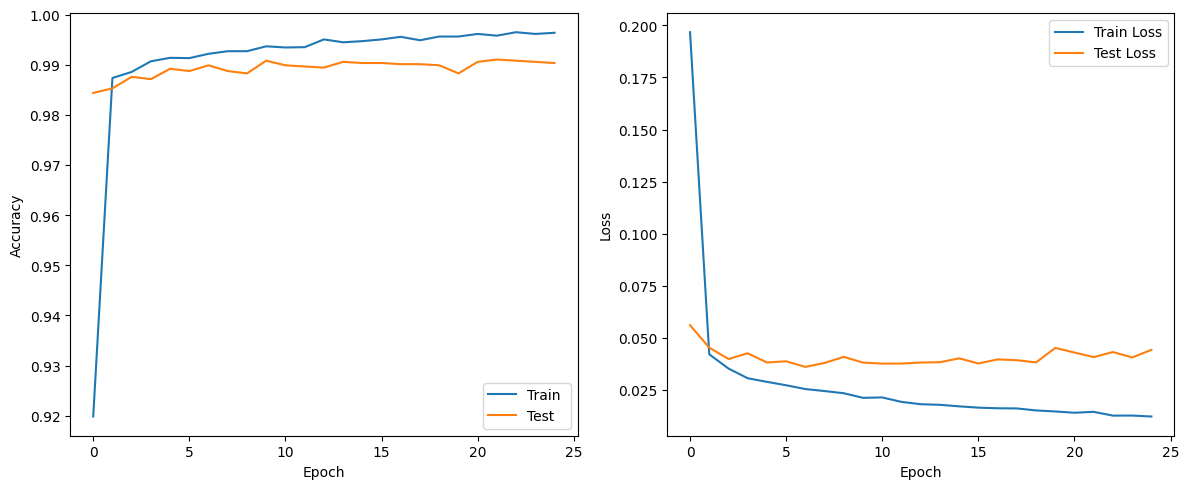

              precision    recall  f1-score   support

           0      0.989     0.997     0.993      1386
           1      0.992     0.992     0.992      1592
           2      0.989     0.981     0.985      1376

    accuracy                          0.990      4354
   macro avg      0.990     0.990     0.990      4354
weighted avg      0.990     0.990     0.990      4354



In [3]:
x = np.concatenate([x_train, x_test])
y = np.concatenate([y_train, y_test])

mask = np.isin(y, [0,1,2])
x = x[mask]
y = y[mask]

x = x.astype("float32") / 255
x = x.reshape(-1, 28*28)

x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


model = keras.Sequential([layers.Dense(4, activation='linear', input_shape=(784,)),
                         layers.Dense(8, activation='relu'),
                         layers.Dense(3, activation='softmax')])

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test))

plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train ')
plt.plot(history.history['val_accuracy'], label='Test')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_classes, digits=3))
              